In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc,average_precision_score, roc_auc_score
from scipy import stats


In [4]:
def get_fpr_tpr(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    # Calculate p-value
    n1 = sum(y_true)  # Number of positive samples
    n2 = len(y_true) - n1  # Number of negative samples
    q1 = roc_auc / (2 - roc_auc)
    q2 = 2 * roc_auc ** 2 / (1 + roc_auc)

    # Standard error of AUC
    se_auc = np.sqrt((roc_auc * (1 - roc_auc) +
                     (n1 - 1) * (q1 - roc_auc ** 2) +
                     (n2 - 1) * (q2 - roc_auc ** 2)) / (n1 * n2))

    # z-score and two-sided p-value for AUC ≠ 0.5
    z = (roc_auc - 0.5) / se_auc
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))

    # Cap minimum p-value for reporting
    if p_value <= 0.001:
        p_value = 0.001

    return fpr, tpr, p_value

In [3]:
def bootstrap_auc(y_true, y_prob, n_bootstraps=1000, rng_seed=42):
    rng = np.random.RandomState(rng_seed)
    bootstrapped_scores = []

    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_prob), len(y_prob))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_prob[indices])
        bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]

    auc = f'{np.mean(bootstrapped_scores):.4f}'
    ci_l = f'{confidence_lower:.4f}'
    ci_u = f'{confidence_upper:.4f}'

    return float(auc), f'{auc}({ci_l}-{ci_u})'

def bootstrap_prc(y_true, y_prob, n_bootstraps=1000, rng_seed=42):
    rng = np.random.RandomState(rng_seed)
    bootstrapped_scores = []

    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_prob), len(y_prob))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = average_precision_score(y_true[indices], y_prob[indices])
        bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]

    auc = f'{np.mean(bootstrapped_scores):.4f}'
    ci_l = f'{confidence_lower:.4f}'
    ci_u = f'{confidence_upper:.4f}'

    return float(auc), f'{auc}({ci_l}-{ci_u})'

In [5]:
PredMS_probs = np.array([0.65965873, 0.66239141, 0.58385729, 0.68024048, 0.66656097,
       0.73194899, 0.58685   , 0.58087619, 0.47477619, 0.23851508,
       0.55036984, 0.82032619, 0.81461429, 0.66644286, 0.3742627 ,
       0.81516609, 0.45867403, 0.6388715 , 0.73951905, 0.76321205,
       0.49604815, 0.2948246 , 0.3237754 , 0.4330754 , 0.35650339,
       0.68834762, 0.56923095, 0.89712857, 0.47365253, 0.48525952,
       0.57648492, 0.40845238, 0.5785627 , 0.60035397, 0.51720152,
       0.33934206, 0.52798571, 0.86951905, 0.52120635, 0.53040159,
       0.45671111, 0.79642981, 0.3180754 , 0.34823095, 0.29459841,
       0.50514437, 0.53738571, 0.32026746, 0.68670238, 0.41024048,
       0.75330714, 0.37072063, 0.32083571, 0.25763658, 0.52120983,
       0.62301429, 0.6270373 , 0.64781429, 0.28438571, 0.50912857,
       0.5675873 , 0.68070079, 0.59311991, 0.63277576, 0.57312381,
       0.58963333, 0.72919206, 0.68729069, 0.63685714, 0.52628254,
       0.53483889, 0.54319827, 0.58274603, 0.72374127, 0.46806667,
       0.6817    , 0.7404873 , 0.52004524, 0.5028    , 0.44210469,
       0.68299206, 0.64064762, 0.465264  , 0.43399762, 0.32267857,
       0.81693254, 0.44902915, 0.82677143, 0.6198754 , 0.63940007,
       0.42915873, 0.52834524, 0.46074683, 0.563534  , 0.67487157,
       0.42503571, 0.88929069, 0.73075866, 0.40306255, 0.28163384,
       0.74611746, 0.4984    , 0.76492857, 0.71180873, 0.60283211,
       0.68805678, 0.62633706, 0.71646508, 0.66662143, 0.45533681,
       0.6004746 , 0.57520397, 0.39687937, 0.58788413, 0.68337778,
       0.46004841, 0.43175873, 0.56191041, 0.59190397, 0.44691587,
       0.73316667, 0.48515635, 0.44182583, 0.50888968, 0.40693095,
       0.68398716, 0.58140317, 0.86136508, 0.8418899 , 0.39775317,
       0.76582778, 0.6200412 , 0.40878348, 0.7666026 , 0.66086825,
       0.57121061, 0.65720238, 0.66130794, 0.24844286, 0.35701032,
       0.45870873, 0.51004524, 0.53166133, 0.40648095, 0.70080339,
       0.5378816 , 0.76846667, 0.81303968, 0.44287381, 0.61403413,
       0.65710714, 0.66220404, 0.62542489, 0.44706825, 0.56982554,
       0.33573889, 0.47244603, 0.64914206, 0.68615556, 0.44508824,
       0.75191642, 0.5857619 , 0.78060317, 0.68922937, 0.63401681,
       0.66785476, 0.49261118, 0.81419603, 0.63220693, 0.39034921,
       0.4143619 , 0.5132873 , 0.38489615, 0.42474683, 0.32685397,
       0.65366667, 0.65015483, 0.64228095, 0.5725342 , 0.58529444,
       0.66153651, 0.34756984, 0.65187143, 0.44764163, 0.74255476,
       0.26299762, 0.59868658, 0.62948254, 0.1531373 , 0.59117208,
       0.66745014, 0.57137431, 0.51837143, 0.60304921, 0.44635159,
       0.83845556, 0.83754921, 0.5233254 , 0.73402273, 0.7120184 ,
       0.67391667, 0.53291508, 0.83192641, 0.68748284, 0.60203175,
       0.5547398 , 0.38455   , 0.34923665, 0.51137294, 0.41241587,
       0.74054048, 0.59054524, 0.40857857, 0.40419127, 0.47591099,
       0.42619437, 0.37725   , 0.84580714, 0.64956313, 0.28302222,
       0.46809206, 0.35528752, 0.28082143, 0.75955397, 0.55611039,
       0.58551429, 0.31954444, 0.35504921, 0.63616623, 0.47566558,
       0.37209048, 0.61455   , 0.49626198, 0.40820368, 0.39708651,
       0.62443095, 0.41032193, 0.44493968, 0.59285794, 0.5906316 ,
       0.52487258, 0.70009141, 0.57668492, 0.53830079, 0.74390543,
       0.6723619 , 0.69732619, 0.66941227, 0.62934127, 0.5974461 ,
       0.73871558, 0.28337922, 0.8010873 , 0.40354603, 0.72551169,
       0.57705079, 0.84791508, 0.81325657, 0.62494841, 0.88353254,
       0.57439841, 0.72117713, 0.38776111, 0.6158254 , 0.51512698,
       0.54862078, 0.58556905, 0.5094461 , 0.7112873 , 0.28781429,
       0.73273651, 0.68589055, 0.54587937, 0.63190303, 0.51205635,
       0.55532453, 0.49343175, 0.76808016, 0.35136494, 0.60060231,
       0.51540238, 0.33688319, 0.45365397, 0.70152706, 0.73061667,
       0.6824324 , 0.69623023, 0.76969841, 0.60583831, 0.62138535,
       0.47339127, 0.56431183, 0.49999365, 0.59333571, 0.59212222,
       0.47857937, 0.31415794, 0.72726032, 0.68822496, 0.59819524,
       0.66495952, 0.62611667, 0.7709381 , 0.60107143, 0.46285556,
       0.25590823, 0.73949206, 0.33268571, 0.68481313, 0.59511003,
       0.6983772 , 0.63255   , 0.49417843, 0.64024719, 0.5412399 ,
       0.57537864, 0.25933571, 0.69112641, 0.7469881 , 0.49211429,
       0.33233254, 0.58025952, 0.52675613, 0.62220714, 0.76759286,
       0.69170563, 0.52637698, 0.87461912, 0.59809603, 0.5053746 ,
       0.59672873, 0.64486429, 0.60393571, 0.42754286, 0.86485714,
       0.40137063, 0.38938795, 0.59869444, 0.50408889, 0.2460254 ,
       0.44551905, 0.80830498, 0.56653492, 0.65877857, 0.469     ,
       0.38972302, 0.50175556, 0.71018261, 0.47223564, 0.56512143,
       0.49880635, 0.49104524, 0.35805476, 0.4752754 , 0.78153745,
       0.41558052, 0.59634986, 0.49280476, 0.47013571, 0.54990714,
       0.59643752, 0.40831905, 0.65373651, 0.70181515, 0.66310159,
       0.63229372, 0.41440094, 0.73401587, 0.7791153 , 0.80996349,
       0.58086104, 0.87856349, 0.68223571, 0.4088969 , 0.62836667,
       0.75445351, 0.43000159, 0.33238413, 0.40600397, 0.56600469,
       0.62734798, 0.56261508, 0.82522763, 0.48712698, 0.44792092,
       0.66304776, 0.61364683, 0.69346746, 0.36177128, 0.49139603,
       0.69346032, 0.47540368, 0.59215491, 0.57361364, 0.37304228,
       0.53409762, 0.73515303, 0.56358903, 0.3806627 , 0.83604221,
       0.62884065, 0.64538903, 0.4689246 , 0.62148074, 0.51399683,
       0.60015491, 0.75871032, 0.72911962, 0.65912872, 0.61118919,
       0.76958095, 0.53850317, 0.7303254 , 0.55734921, 0.80591746,
       0.68153745, 0.86757302, 0.62281508, 0.62367619, 0.61408528,
       0.38162778, 0.60004365, 0.4605873 , 0.49479512, 0.42960159,
       0.60038437, 0.55860476, 0.45514286, 0.84687381, 0.52975952,
       0.93698889, 0.64656263, 0.34504762, 0.81034351, 0.30574664,
       0.67101432, 0.58752338, 0.88790094, 0.61698046, 0.28332222,
       0.73932424, 0.54382893, 0.55230635, 0.44764286, 0.65617063,
       0.60901825, 0.48397381, 0.70280519, 0.47778427, 0.40391587,
       0.65009949, 0.51490714, 0.56338333, 0.68561825, 0.50020238,
       0.68487302, 0.48344286, 0.48150808, 0.51973797, 0.3462881 ,
       0.52107778, 0.74095873, 0.51643499, 0.49817143, 0.62992222,
       0.41975238, 0.23522143, 0.75275072, 0.86578781, 0.76410635,
       0.77768016, 0.52270931, 0.53613254, 0.54030397, 0.61817619,
       0.63952857, 0.23160556, 0.23617619, 0.62545556, 0.82073535,
       0.63030678, 0.73422857, 0.75018492])

In [6]:
MetaboGNN_probs = np.array([0.39140356, 0.86973074, 0.67111559, 0.49301847, 0.76924242,
       0.90945934, 0.38744316, 0.44765166, 0.41579397, 0.31055466,
       0.50122164, 0.81603746, 0.83555726, 0.58145067, 0.21591359,
       0.80223689, 0.55607887, 0.70173027, 0.92332885, 0.77636086,
       0.27031456, 0.41781986, 0.25512894, 0.41032097, 0.39434489,
       0.46898436, 0.53337124, 0.71411705, 0.36580338, 0.25063103,
       0.61510698, 0.32447019, 0.36431952, 0.48883682, 0.45385798,
       0.16770109, 0.65690903, 0.82365046, 0.48718941, 0.29207017,
       0.49631147, 0.85816507, 0.12087088, 0.3194515 , 0.34975516,
       0.78080367, 0.32272329, 0.60442924, 0.56367228, 0.67183668,
       0.86992111, 0.58892736, 0.47524378, 0.29073033, 0.29861248,
       0.41418638, 0.53617619, 0.68677107, 0.14460314, 0.29447002,
       0.42523268, 0.77017677, 0.59712795, 0.81703789, 0.47433746,
       0.53549011, 0.73386612, 0.79656509, 0.54949947, 0.54302877,
       0.65045301, 0.43648811, 0.60073845, 0.70477007, 0.51063181,
       0.8290425 , 0.78889488, 0.47335215, 0.7295322 , 0.50941603,
       0.73264361, 0.87892177, 0.67638685, 0.3971694 , 0.60989458,
       0.76892284, 0.68315899, 0.95994808, 0.70416784, 0.58613329,
       0.31711638, 0.55024599, 0.59359527, 0.52840952, 0.85423032,
       0.66738539, 0.81041266, 0.78184031, 0.28605449, 0.18540302,
       0.73100274, 0.26130587, 0.85860382, 0.69113512, 0.5328146 ,
       0.68302902, 0.58944428, 0.9173538 , 0.69882881, 0.42474831,
       0.64229   , 0.46718985, 0.41064264, 0.71208103, 0.54003794,
       0.2039396 , 0.4050811 , 0.69717115, 0.3948672 , 0.39353733,
       0.85345409, 0.81126356, 0.28938238, 0.62712954, 0.35279093,
       0.78878038, 0.60802078, 1.02754805, 0.53621516, 0.28273541,
       0.4844725 , 0.27418975, 0.57380394, 0.76244501, 0.53544891,
       0.51898386, 0.86470797, 0.68538502, 0.07926821, 0.50981462,
       0.27610559, 0.26868431, 0.61144493, 0.21518481, 0.71267687,
       0.34194044, 0.88382024, 0.94162958, 0.183188  , 0.66595991,
       0.48303381, 0.86395605, 0.68005911, 0.25366102, 0.51195448,
       0.50430403, 0.32686042, 0.59932503, 0.20160326, 0.12583766,
       0.79595741, 0.62914994, 0.75602268, 0.6154353 , 0.63277718,
       0.65878963, 0.46216247, 0.58161806, 0.67663567, 0.31932426,
       0.39382051, 0.45097723, 0.45480398, 0.0697516 , 0.18191097,
       0.73159782, 0.85837675, 0.49255005, 0.47617874, 0.78355932,
       0.42258131, 0.26482565, 0.35436019, 0.32100875, 0.37939445,
       0.21057132, 0.16314991, 0.53227749, 0.08291852, 0.51843746,
       0.89671662, 0.47731611, 0.1417403 , 0.64327227, 0.35471396,
       0.36918745, 0.80367208, 0.53589861, 0.80771156, 0.78763493,
       0.41716192, 0.31509632, 0.89976063, 0.70604662, 0.56836397,
       0.69496046, 0.29614325, 0.27209313, 0.25604889, 0.37623398,
       0.53682854, 0.72427689, 0.4475629 , 0.50677391, 0.62869228,
       0.31495264, 0.22754038, 0.75074148, 0.77491487, 0.43082355,
       0.36576269, 0.68263617, 0.09296712, 0.8399677 , 0.75196619,
       0.49671619, 0.40193993, 0.52109272, 0.41523378, 0.16079326,
       0.30886954, 0.57849922, 0.62776663, 0.50453772, 0.32412179,
       0.57572979, 0.38357201, 0.43488934, 0.36109827, 0.66261339,
       0.60143574, 0.76167776, 0.77332516, 0.4282795 , 0.8092182 ,
       0.72661392, 0.80708165, 0.37566149, 0.66035423, 0.65841584,
       0.88286497, 0.47501078, 0.88008158, 0.48904688, 0.83521186,
       0.31363163, 0.86387001, 0.87806978, 0.70820923, 0.85347303,
       0.59085642, 0.75598322, 0.62320278, 0.53977932, 0.356271  ,
       0.48506788, 0.35084888, 0.71301746, 0.80847626, 0.17153997,
       0.88201904, 0.62915035, 0.69213642, 0.64822031, 0.21846966,
       0.38104893, 0.39742918, 0.77245104, 0.29326533, 0.57341854,
       0.40881775, 0.19023892, 0.2640288 , 0.84428649, 0.68074553,
       0.68125158, 0.85088661, 0.93476717, 0.49065731, 0.43759567,
       0.2428139 , 0.47054876, 0.45256958, 0.40740032, 0.71725666,
       0.2099349 , 0.39184202, 0.50114199, 0.77724873, 0.7313866 ,
       0.70517284, 0.80371084, 0.81476604, 0.74230671, 0.53855127,
       0.22987666, 0.73787231, 0.28262569, 0.36277409, 0.516182  ,
       0.79629034, 0.62485228, 0.23265846, 0.62666725, 0.42005957,
       0.60864838, 0.37883638, 0.38859072, 0.60553457, 0.83498555,
       0.3702094 , 0.55629666, 0.73682892, 0.37907713, 0.52547604,
       0.48628365, 0.50542555, 0.83249126, 0.79575811, 0.49774509,
       0.91012369, 0.32019466, 0.60395056, 0.39765612, 0.8473106 ,
       0.3077556 , 0.43875095, 0.81729923, 0.7344537 , 0.22361621,
       0.13907055, 0.85945381, 0.41730527, 0.39997028, 0.59486725,
       0.30313669, 0.35627898, 0.79136292, 0.27331829, 0.66823242,
       0.33540754, 0.35997952, 0.26585857, 0.5020752 , 0.7649519 ,
       0.20766315, 0.90628613, 0.37724533, 0.2794369 , 0.56628895,
       0.23036768, 0.39365273, 0.85995264, 0.39366165, 0.6488578 ,
       0.76901388, 0.19518453, 0.65151186, 0.72839401, 0.76709817,
       0.78774239, 0.95951439, 0.55616267, 0.22226456, 0.32210398,
       0.91070784, 0.41881399, 0.72231012, 0.38247772, 0.47422443,
       0.40922539, 0.37425991, 0.9571983 , 0.28563692, 0.76150016,
       0.83765045, 0.4923399 , 0.76677242, 0.42550301, 0.22420077,
       0.78974897, 0.53542654, 0.63060723, 0.52606276, 0.5482206 ,
       0.50360981, 0.83329111, 0.51124014, 0.42670783, 0.80338379,
       0.63080774, 0.71534101, 0.58271294, 0.71351357, 0.51784615,
       0.67919838, 0.41685129, 0.57685572, 0.79278795, 0.46607666,
       0.87986876, 0.47294357, 0.87750057, 0.21899562, 0.60556711,
       0.49327669, 0.80220338, 0.62919216, 0.64357087, 0.39053303,
       0.23787574, 0.7543788 , 0.51911741, 0.71226276, 0.69483089,
       0.71509485, 0.57789124, 0.42848483, 0.79290779, 0.49646889,
       0.88547447, 0.45262512, 0.37992765, 0.77470371, 0.11839072,
       0.75248785, 0.49698467, 0.89552063, 0.67299961, 0.31589735,
       0.66002892, 0.52128967, 0.21183922, 0.62843699, 0.64805765,
       0.46342426, 0.35145742, 0.6287903 , 0.41957047, 0.28334914,
       0.70698238, 0.38930312, 0.25982269, 0.69860672, 0.57203362,
       0.74202734, 0.34043838, 0.10615502, 0.22949519, 0.41669624,
       0.16798222, 0.8753666 , 0.45412572, 0.26962523, 0.62920814,
       0.22432404, 0.2775362 , 0.94801609, 0.79376066, 0.55384745,
       0.91148903, 0.57009975, 0.31440163, 0.46534985, 0.59635572,
       0.76167597, 0.6353282 , 0.14562259, 0.37991212, 0.92984166,
       0.66043728, 0.79571271, 0.69213472])

In [7]:
ms_bacl_prob = np.array([0.378753  , 0.87991637, 0.5845957 , 0.7492065 , 0.77104056,
       0.48129362, 0.49762276, 0.49953136, 0.5031888 , 0.1191789 ,
       0.5124992 , 0.87263626, 0.74888444, 0.5124251 , 0.21296076,
       0.9043209 , 0.2182053 , 0.8835508 , 0.8424687 , 0.5050884 ,
       0.2349593 , 0.07932872, 0.06326494, 0.34459352, 0.2913565 ,
       0.53602743, 0.5807234 , 0.8678467 , 0.65349674, 0.15158328,
       0.50603074, 0.17303455, 0.3340801 , 0.60084796, 0.8460292 ,
       0.32637423, 0.8655449 , 0.8974328 , 0.23280369, 0.5565081 ,
       0.11760006, 0.8108178 , 0.02310704, 0.33730072, 0.27058   ,
       0.717981  , 0.11758518, 0.18995343, 0.58859116, 0.38631892,
       0.81231815, 0.32512066, 0.6558277 , 0.25781092, 0.4724628 ,
       0.42851466, 0.6354178 , 0.9574274 , 0.14963433, 0.35566938,
       0.594201  , 0.62892884, 0.60137415, 0.7535146 , 0.5880882 ,
       0.7865007 , 0.6763381 , 0.6493532 , 0.68095535, 0.41751942,
       0.3767283 , 0.19718088, 0.6117837 , 0.72928333, 0.4176506 ,
       0.89848757, 0.55629176, 0.4314134 , 0.7694282 , 0.39074266,
       0.9003452 , 0.6706079 , 0.55367625, 0.03220186, 0.2910322 ,
       0.9501903 , 0.49776685, 0.95926374, 0.81462103, 0.46453226,
       0.24618222, 0.2921618 , 0.47808677, 0.6386359 , 0.49173197,
       0.44390115, 0.95274943, 0.8564002 , 0.3545635 , 0.33766547,
       0.8673339 , 0.20555308, 0.8557168 , 0.8957103 , 0.8525076 ,
       0.6349747 , 0.18808118, 0.9839987 , 0.66179013, 0.40038145,
       0.66581297, 0.3883382 , 0.17873088, 0.8882453 , 0.8009763 ,
       0.3432894 , 0.22099794, 0.8035684 , 0.49992764, 0.3487858 ,
       0.9077213 , 0.52041227, 0.28556037, 0.6476478 , 0.06301896,
       0.8548554 , 0.43699333, 0.66893476, 0.7172172 , 0.28073928,
       0.7379896 , 0.36176842, 0.29741973, 0.899412  , 0.38597223,
       0.51463944, 0.97850937, 0.85999763, 0.02204414, 0.19594972,
       0.04471027, 0.35412285, 0.8295583 , 0.12373962, 0.90281546,
       0.4802454 , 0.8852708 , 0.7543999 , 0.8360411 , 0.86896336,
       0.5546973 , 0.71026844, 0.5935244 , 0.07392937, 0.59837514,
       0.8881595 , 0.5387992 , 0.65939176, 0.5831324 , 0.4740582 ,
       0.96804124, 0.5983566 , 0.6348124 , 0.82557416, 0.62731516,
       0.56332445, 0.49298275, 0.45789236, 0.5121522 , 0.13617696,
       0.7139819 , 0.67589194, 0.40231732, 0.11641164, 0.27414367,
       0.7121478 , 0.6841452 , 0.57353276, 0.667122  , 0.779119  ,
       0.20782499, 0.39700055, 0.5585595 , 0.22438306, 0.62765384,
       0.3543731 , 0.17192303, 0.17651978, 0.14854957, 0.6570211 ,
       0.7349488 , 0.6098545 , 0.11637148, 0.7499794 , 0.23154564,
       0.53528494, 0.92664737, 0.77402174, 0.9141491 , 0.84370923,
       0.6723377 , 0.2738638 , 0.813032  , 0.899024  , 0.70116657,
       0.7724284 , 0.30128866, 0.11952432, 0.19395839, 0.12862006,
       0.21423645, 0.92598444, 0.2480427 , 0.27212366, 0.31108436,
       0.07727387, 0.26020035, 0.6590401 , 0.9551298 , 0.27765742,
       0.39207566, 0.75986964, 0.01522355, 0.936771  , 0.5661801 ,
       0.29702416, 0.11344672, 0.3597711 , 0.44414836, 0.47063777,
       0.51160073, 0.7905236 , 0.5331203 , 0.4709432 , 0.22293742,
       0.7465212 , 0.20252742, 0.77277637, 0.37463152, 0.11554091,
       0.61158323, 0.8500631 , 0.786215  , 0.7686966 , 0.95977706,
       0.89725345, 0.8968508 , 0.7024268 , 0.47769222, 0.9071485 ,
       0.9245221 , 0.35100153, 0.85665524, 0.8376393 , 0.88020694,
       0.6170957 , 0.56795496, 0.923613  , 0.37145653, 0.91492224,
       0.6737447 , 0.9872113 , 0.48763493, 0.5144019 , 0.084792  ,
       0.5648776 , 0.5543512 , 0.9020229 , 0.9055639 , 0.05841083,
       0.8663833 , 0.5620557 , 0.6233367 , 0.33331013, 0.4404915 ,
       0.11508758, 0.45507625, 0.70213485, 0.07928325, 0.76917154,
       0.36480382, 0.09569718, 0.08554654, 0.708226  , 0.9008974 ,
       0.8596597 , 0.9644444 , 0.9448877 , 0.65273786, 0.58197546,
       0.31422448, 0.5563621 , 0.821943  , 0.51420516, 0.718417  ,
       0.29903597, 0.16235323, 0.27228114, 0.77103555, 0.4381741 ,
       0.80054426, 0.96134454, 0.930498  , 0.72063947, 0.67173386,
       0.08962895, 0.84682834, 0.22670022, 0.3767736 , 0.5806353 ,
       0.47741744, 0.7396718 , 0.2941992 , 0.43168938, 0.2204526 ,
       0.82997066, 0.21461539, 0.60821956, 0.4672843 , 0.8239051 ,
       0.04164571, 0.4646359 , 0.877573  , 0.52566624, 0.7233232 ,
       0.8507996 , 0.6695395 , 0.96653205, 0.70924485, 0.5795803 ,
       0.71640563, 0.27660236, 0.24089047, 0.2049087 , 0.881175  ,
       0.1481379 , 0.06894678, 0.54879206, 0.6597757 , 0.03934846,
       0.12141091, 0.7380569 , 0.41799375, 0.23442382, 0.43350852,
       0.7362289 , 0.5025192 , 0.9509493 , 0.26846084, 0.74709445,
       0.21336661, 0.56076086, 0.07970961, 0.8034357 , 0.45393705,
       0.09269616, 0.9910239 , 0.27924716, 0.07431402, 0.60182744,
       0.5502901 , 0.60749686, 0.6777685 , 0.28433672, 0.62350744,
       0.8062204 , 0.425633  , 0.4026044 , 0.78829217, 0.8671109 ,
       0.35292798, 0.9136208 , 0.41652125, 0.20244965, 0.28401014,
       0.9191196 , 0.45015696, 0.5401851 , 0.81901795, 0.7905322 ,
       0.49060354, 0.61501735, 0.8980933 , 0.40204477, 0.6338747 ,
       0.96882474, 0.42043883, 0.8715473 , 0.10432871, 0.0831105 ,
       0.8913811 , 0.13569587, 0.47308046, 0.27035013, 0.766478  ,
       0.7722635 , 0.8647887 , 0.47351897, 0.02823928, 0.93308616,
       0.8436743 , 0.66768783, 0.54588586, 0.44152308, 0.6328514 ,
       0.832186  , 0.6128289 , 0.62058014, 0.7457382 , 0.54605293,
       0.95539826, 0.5351458 , 0.9415277 , 0.22440982, 0.909741  ,
       0.44698712, 0.6940469 , 0.6384001 , 0.8627229 , 0.782997  ,
       0.08878235, 0.9247502 , 0.70506877, 0.6344964 , 0.76540047,
       0.5659676 , 0.4430695 , 0.45887402, 0.8949693 , 0.64029866,
       0.9299499 , 0.601199  , 0.6039992 , 0.79528964, 0.15241292,
       0.9420496 , 0.49377143, 0.8590599 , 0.7048508 , 0.1090807 ,
       0.7003035 , 0.60050726, 0.5706779 , 0.2430596 , 0.75321186,
       0.94111186, 0.23985071, 0.77347016, 0.19031961, 0.41928896,
       0.9050325 , 0.38012922, 0.28126186, 0.5994973 , 0.824504  ,
       0.7067534 , 0.36705875, 0.15153386, 0.14680882, 0.27895293,
       0.12343086, 0.9297171 , 0.34835085, 0.49112582, 0.8864666 ,
       0.15541758, 0.05641365, 0.9674402 , 0.8154807 , 0.45619413,
       0.93565613, 0.58695525, 0.5311996 , 0.24410518, 0.80238855,
       0.9261295 , 0.53349984, 0.20341559, 0.48717704, 0.9899978 ,
       0.17781465, 0.9019545 , 0.70919526])

In [8]:
y_true = np.array([0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1.])

0.7425 0.7425(0.7049-0.7775)
0.7892 0.7892(0.7561-0.8207)
0.8137 0.8137(0.7813-0.8476)


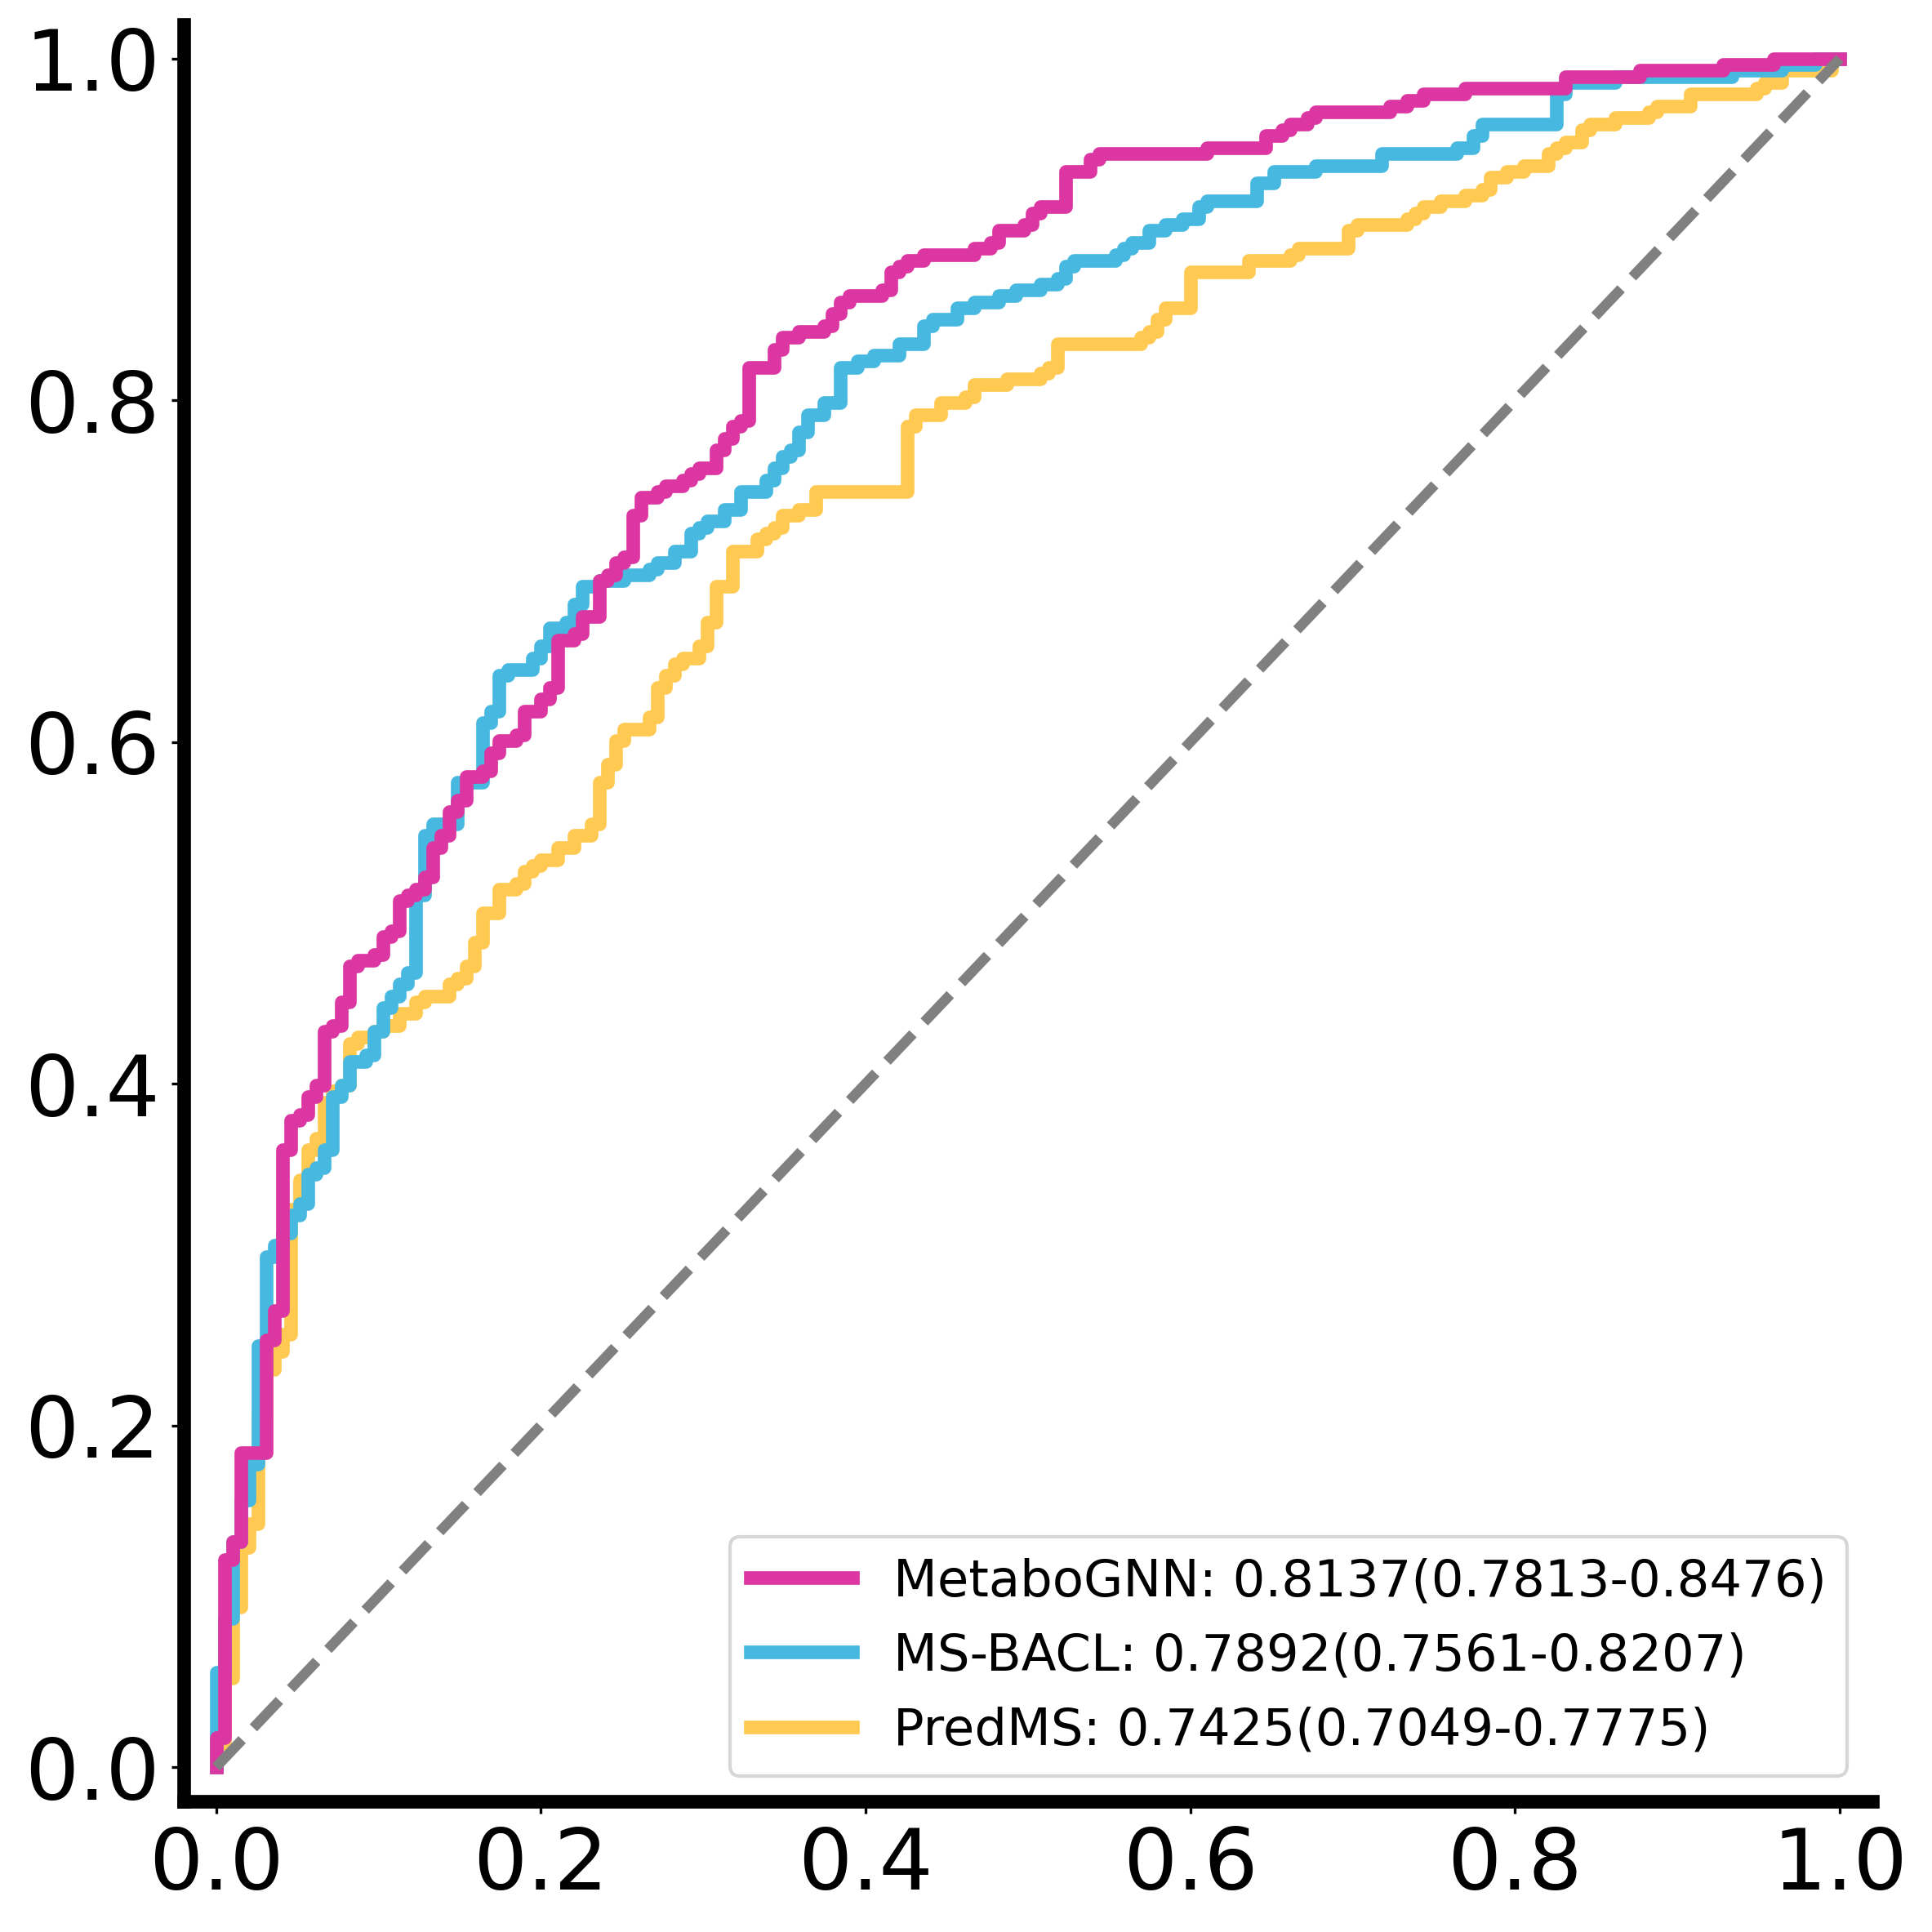

In [17]:
# plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 8), dpi=300)

# Original data and colors
all_probs = [PredMS_probs, ms_bacl_prob, MetaboGNN_probs]
model_names = ['PredMS', 'MS-BACL', 'MetaboGNN']
colors = ['#FFC952', '#47B8E0', '#DB36A1']

data = []

# Plot PredMS and MS-BACL first
for idx in range(len(model_names) - 1):  # Exclude the last model (MetaboGNN)
    model_name = model_names[idx]
    y_prob = all_probs[idx]

    fpr, tpr, p = get_fpr_tpr(y_true, y_prob)
    roc_auc, roc_auc_ci = bootstrap_auc(y_true, y_prob)
    data.append({'model': model_name, 'metric': 'roc_auc', 'score': roc_auc, 'score_ci': roc_auc_ci})
    print(roc_auc, roc_auc_ci)
    plt.plot(fpr, tpr, color=colors[idx], lw=4, label=model_name + f': {roc_auc_ci}')

# Plot MetaboGNN last so that it appears on top
idx = len(model_names) - 1  # Index of MetaboGNN
model_name = model_names[idx]
y_prob = all_probs[idx]

fpr, tpr, p = get_fpr_tpr(y_true, y_prob)
roc_auc, roc_auc_ci = bootstrap_auc(y_true, y_prob)
data.append({'model': model_name, 'metric': 'roc_auc', 'score': roc_auc, 'score_ci': roc_auc_ci})
print(roc_auc, roc_auc_ci)
plt.plot(fpr, tpr, color=colors[idx], lw=4, label=model_name + f': {roc_auc_ci}')

plt.grid(True, linestyle='--', alpha=0.7)

# Set the diagonal dashed line to gray
plt.plot([0, 1], [0, 1], color='gray', lw=3, linestyle='--')  # gray dashed line
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.grid(False)

ax = plt.gca()

# Customize axis spines
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(4.0)
ax.spines['left'].set_linewidth(4.0)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Manually set legend order to show MetaboGNN last
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0]  # 'PredMS', 'MS-BACL', 'MetaboGNN' order
plt.legend([handles[idx] for idx in order],
           [labels[idx] for idx in order],
           loc="lower right", fontsize=15)

plt.tight_layout()  # Automatically adjust layout

plt.savefig(f'RocCurve.jpg', dpi=300, format='jpg', bbox_inches='tight')

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def get_precision_recall(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    average_precision = average_precision_score(y_true, y_prob)

    # p-value calculation (Note: p-values are not typically calculated for PR curves,
    # but we return a dummy value here to maintain compatibility with existing code structure)
    p_value = 0.001
    return precision, recall, p_value, average_precision


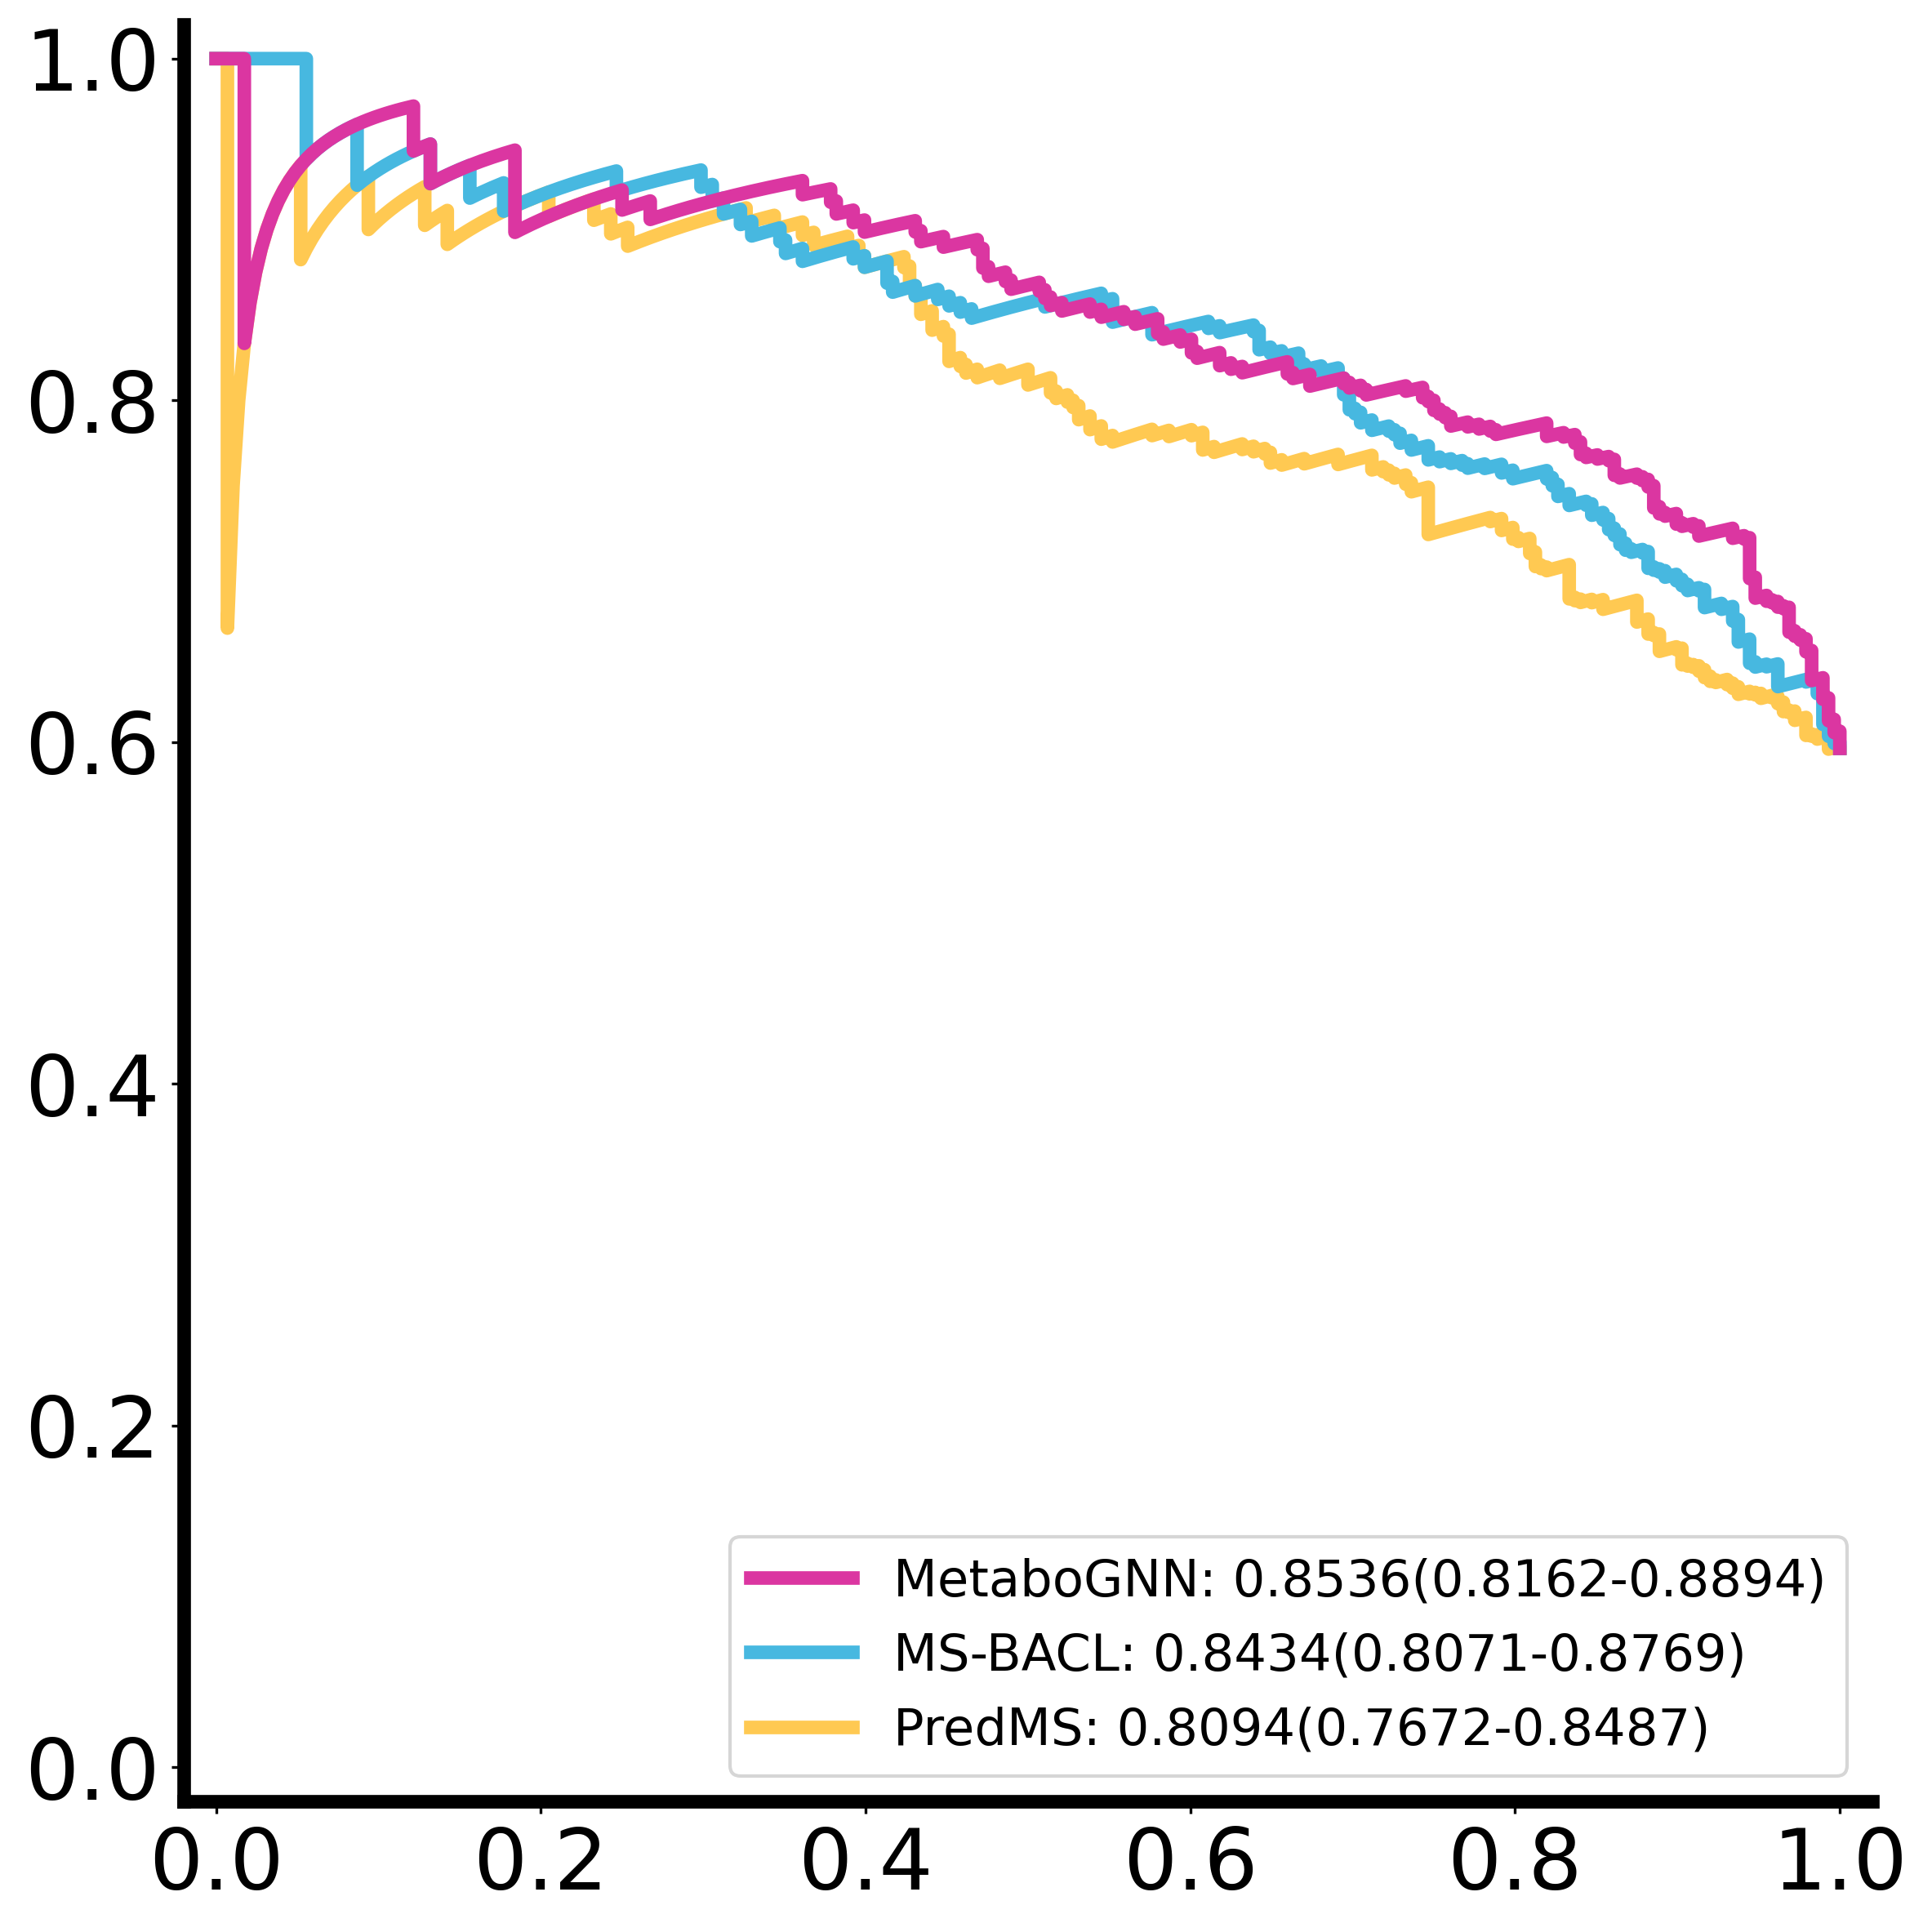

In [19]:
# plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 8), dpi=300)

# Define model probabilities and corresponding colors
all_probs = [PredMS_probs, ms_bacl_prob, MetaboGNN_probs]
model_names = ['PredMS', 'MS-BACL', 'MetaboGNN']
colors = ['#FFC952', '#47B8E0', '#DB36A1']

data = []

# Plot PR curves for PredMS and MS-BACL first
for idx in range(len(model_names) - 1):  # Exclude the last model (MetaboGNN)
    model_name = model_names[idx]
    y_prob = all_probs[idx]

    precision, recall, p, average_precision = get_precision_recall(y_true, y_prob)
    average_precision, average_precision_ci = bootstrap_prc(y_true, y_prob)
    data.append({'model': model_name, 'metric': 'prc_auc', 'score': average_precision, 'score_ci': average_precision_ci})
    plt.plot(recall, precision, color=colors[idx], lw=4, label=model_name + f': {average_precision_ci}')

# Plot MetaboGNN last so that its curve appears on top
idx = len(model_names) - 1  # Index for MetaboGNN
model_name = model_names[idx]
y_prob = all_probs[idx]

precision, recall, p, average_precision = get_precision_recall(y_true, y_prob)
average_precision, average_precision_ci = bootstrap_prc(y_true, y_prob)
data.append({'model': model_name, 'metric': 'prc_auc', 'score': average_precision, 'score_ci': average_precision_ci})
plt.plot(recall, precision, color=colors[idx], lw=4, label=model_name + f': {average_precision_ci}')

plt.grid(False)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])

ax = plt.gca()

# Customize axis borders
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(4.0)
ax.spines['left'].set_linewidth(4.0)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Manually set legend order to show MetaboGNN last
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0]  # Order: 'PredMS', 'MS-BACL', 'MetaboGNN'
plt.legend([handles[idx] for idx in order],
           [labels[idx] for idx in order],
           loc="lower right", fontsize=15)

plt.tight_layout()

plt.savefig(f'PrcCurve.jpg', dpi=300, format='jpg', bbox_inches='tight')
